In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9"]#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']#, "SigmaRR", 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Upload Dataframes:
periods=[1,2,3,4,5]
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_1.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_1.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_1.h5", 0, -1)
dfdata= qr_data.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_1.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_1.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_1.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


In [5]:
qr_mc1.correctAllY(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_1",n_jobs=10) 
qr_mc2.correctAllY(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_1",n_jobs=10) 
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
dfmc = data2.reset_index() 

Corrected variables file (e.g.  correctedTargetsweights_Period_1_EB.h5  ) does not exists. This will take a while...
Correct EB :
-1.4442  <  ScEta  and  ScEta  <  1.4442
Loading mc weights for  R9  : 
    ./weights/weights_Period_1/mc_weights_EB
Loading data weights for  R9
    ./weights/weights_Period_1/data_weights_EB
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9
Writing correctedTargets_ EB .h5
Corrected variables file (e.g.  correctedTargetsweights_Period_1_EE.h5  ) does not exists. This will take a while...
Correct EE :
ScEta  <  -1.57  or  1.57  <  ScEta
Loading mc weights for  R9  : 
    ./weights/weights_Period_1/mc_weights_EE
Loading data weights for  R9
    ./weights/weights_Period_1/data_weights_EE
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9
Writing correctedTargets_ EE .

['R9']
plotting  R9


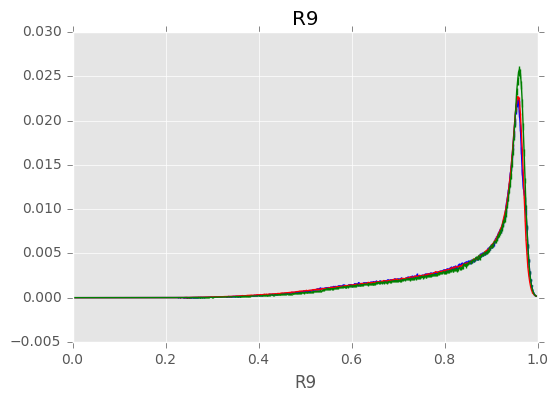

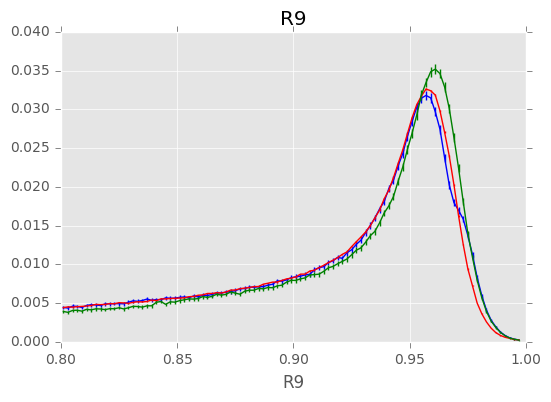

In [6]:
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        rv  = np.arange(0.0,1.0,0.002)
        rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "S4":
        rv  = np.arange(0.0,1.0,0.002)
        rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "SigmaIeIe":
        rv = np.arange(0.004,0.012,0.0002)
        rv2 = np.arange(0.015,0.030,0.0002)
    if yvar == "EtaWidth":
        rv = np.arange(0.0,0.05,0.0002)
        rv2 = np.arange(0.005,0.025,0.0002)
    if yvar == "PhiWidth":
        rv = np.arange(0.0,0.2,0.002)
        rv2 = np.arange(0.0,0.05,0.0006)
    if yvar == "CovarianceIphiIphi":
        rv  = np.arange(0.0, 0.02,0.0002)
        rv2 = np.arange(0.02, 0.05,0.0004)
    if yvar == "CovarianceIetaIphi":
        rv = np.arange(-0.0002, 0.0002,0.000002) 
        rv2 = np.arange(-0.00004, 0.00004,0.000001)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfmc[yvar+"_corr"], rv,Weight=dfmc["weight"], Color="b")
    plot.plotHistErr(dfdata[yvar], rv, Color="r", Weight=dfdata["weight"])
    plot.plotHistErr(dfmc[yvar], rv,Weight=dfmc["weight"], Color="g")  
    ax.set_title(yvar)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfmc[yvar+"_corr"], rv2,Weight=dfmc["weight"], Color="b")
    plot.plotHistErr(dfdata[yvar], rv2, Color="r", Weight=dfdata["weight"])
    plot.plotHistErr(dfmc[yvar], rv2,Weight=dfmc["weight"], Color="g")  
    ax.set_title(yvar)